In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV file
file_path = r"C:\Users\HP\Downloads\My Uber Drives - 2016.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01/01/2016 21:11,01/01/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01/02/2016 01:25,01/02/2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01/02/2016 20:25,01/02/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01/05/2016 17:31,01/05/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01/06/2016 14:42,01/06/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Let's start by cleaning the data for better analysis**

In [2]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()

print("Missing values in each column:\n", missing_data)

Missing values in each column:
 START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [3]:
# Drop rows with missing values 
df = df.dropna(subset=['PURPOSE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*'])

# Check the remaining rows after dropping the missing 'PURPOSE*'
print(f"Remaining rows after dropping missing values in dataframe: {df.shape[0]}")

# Optionally, verify that there are no more missing values in the dataframe
print("\nMissing values in dataframe after cleaning:")
print(df.isnull().sum())

# Display the first few rows of the cleaned dataset
df.head()

Remaining rows after dropping missing values in dataframe: 653

Missing values in dataframe after cleaning:
START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01/01/2016 21:11,01/01/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01/02/2016 20:25,01/02/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01/05/2016 17:31,01/05/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01/06/2016 14:42,01/06/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01/06/2016 17:15,01/06/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [4]:
# Convert 'START_DATE*' and 'END_DATE*' to datetime format
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')

# Verify the conversion by checking the data types
print(df.dtypes)

# Display the first few rows to confirm the conversion
df.head()

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [5]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, display the duplicate rows (if any)
if duplicate_rows.shape[0] > 0:
    print("\nDuplicate rows:")
    print(duplicate_rows)

# Drop duplicates if needed
df = df.drop_duplicates()

# Display the shape of the dataset after removing duplicates
print(f"Shape of dataset after dropping duplicates: {df.shape}")


Number of duplicate rows: 1

Duplicate rows:
            START_DATE*           END_DATE* CATEGORY*  START* STOP*  MILES*  \
492 2016-06-28 23:34:00 2016-06-28 23:59:00  Business  Durham  Cary     9.9   

    PURPOSE*  
492  Meeting  
Shape of dataset after dropping duplicates: (652, 7)


**Trip Duration Analysis**

Trip Duration Statistics (in minutes):
count    652.000000
mean      23.395706
std       25.789348
min        2.000000
25%       11.000000
50%       17.500000
75%       28.000000
max      330.000000
Name: TRIP_DURATION, dtype: float64

Longest Trip:
START_DATE*      2016-03-25 16:52:00
END_DATE*        2016-03-25 22:22:00
CATEGORY*                   Business
START*                         Latta
STOP*                   Jacksonville
MILES*                         310.3
PURPOSE*              Customer Visit
TRIP_DURATION                  330.0
Name: 269, dtype: object

Shortest Trip:
START_DATE*      2016-01-26 17:27:00
END_DATE*        2016-01-26 17:29:00
CATEGORY*                   Business
START*                          Cary
STOP*                           Cary
MILES*                           0.5
PURPOSE*             Errand/Supplies
TRIP_DURATION                    2.0
Name: 44, dtype: object

Average Trip Duration by Category:
CATEGORY*
Business    23.191950
Personal    45.333333
Nam

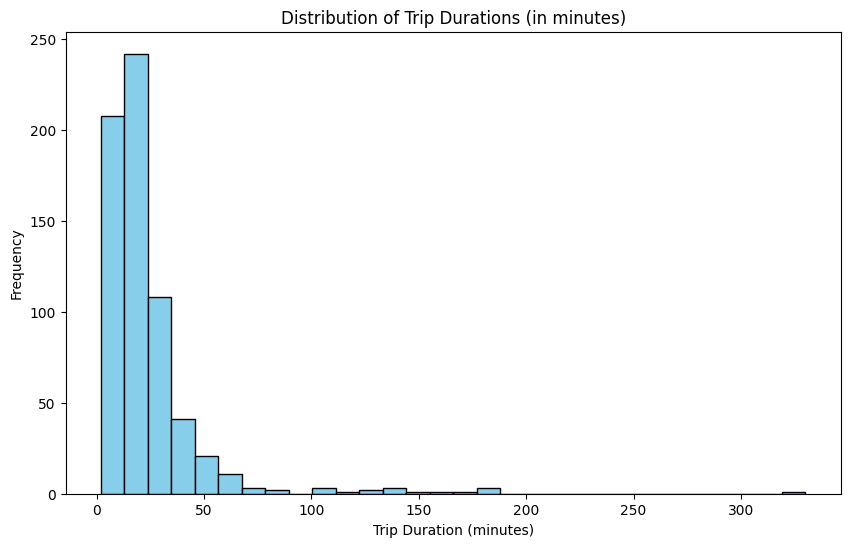

In [6]:
# 1. Calculate trip duration in minutes
df['TRIP_DURATION'] = (df['END_DATE*'] - df['START_DATE*']).dt.total_seconds() / 60

# 2. Display basic statistics of the trip durations
trip_duration_stats = df['TRIP_DURATION'].describe()
print("Trip Duration Statistics (in minutes):")
print(trip_duration_stats)

# 3. Find the longest and shortest trips
longest_trip = df.loc[df['TRIP_DURATION'].idxmax()]
shortest_trip = df.loc[df['TRIP_DURATION'].idxmin()]

print("\nLongest Trip:")
print(longest_trip)

print("\nShortest Trip:")
print(shortest_trip)

# Optional: Group by category (Business vs. Personal) to compare average trip durations
category_duration = df.groupby('CATEGORY*')['TRIP_DURATION'].mean()
print("\nAverage Trip Duration by Category:")
print(category_duration)

# Optional: Visualize the distribution of trip durations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['TRIP_DURATION'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Durations (in minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Trip Duration Analysis Summary

## Average Trip Duration
- The average trip duration is approximately **23.4 minutes**.

## Longest Trip Duration
- The longest trip recorded was **330 minutes**.

## Shortest Trip Duration
- The shortest trip recorded was **2 minutes**.

## Average Trip Duration by Category
- **Business Trips**: The average duration for business trips is around **23.2 minutes**.
- **Personal Trips**: The average duration for personal trips is around **45.3 minutes**.

> The analysis shows that personal trips tend to be longer on average compared to business trips.

# Distance (Miles) Analysis

Basic Statistics for Miles Traveled:
count    652.000000
mean      11.198313
std       23.004020
min        0.500000
25%        3.200000
50%        6.400000
75%       10.400000
max      310.300000
Name: MILES*, dtype: float64

Average and Total Miles Traveled by Category (Business vs. Personal):
                mean     sum
CATEGORY*                   
Business   10.971827  7087.8
Personal   35.583333   213.5

Longest Distance Trip:
START_DATE*      2016-03-25 16:52:00
END_DATE*        2016-03-25 22:22:00
CATEGORY*                   Business
START*                         Latta
STOP*                   Jacksonville
MILES*                         310.3
PURPOSE*              Customer Visit
TRIP_DURATION                  330.0
Name: 269, dtype: object

Shortest Distance Trip:
START_DATE*      2016-01-26 17:27:00
END_DATE*        2016-01-26 17:29:00
CATEGORY*                   Business
START*                          Cary
STOP*                           Cary
MILES*                          

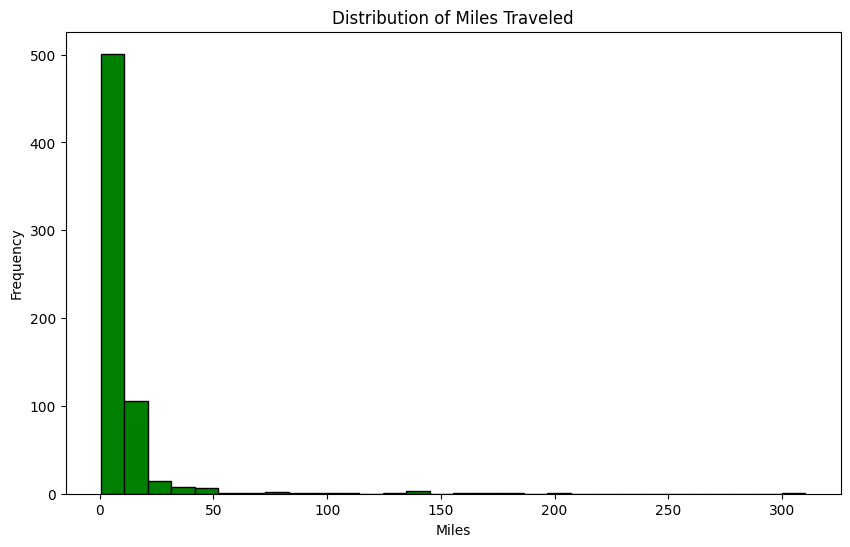

In [7]:
# 1. Basic statistics for 'MILES*'
miles_stats = df['MILES*'].describe()
print("Basic Statistics for Miles Traveled:")
print(miles_stats)

# 2. Category-wise analysis: Compare average and total distance by trip category
category_miles = df.groupby('CATEGORY*')['MILES*'].agg(['mean', 'sum'])
print("\nAverage and Total Miles Traveled by Category (Business vs. Personal):")
print(category_miles)

# 3. Identify the longest and shortest trips in terms of distance
longest_distance_trip = df.loc[df['MILES*'].idxmax()]
shortest_distance_trip = df.loc[df['MILES*'].idxmin()]

print("\nLongest Distance Trip:")
print(longest_distance_trip)

print("\nShortest Distance Trip:")
print(shortest_distance_trip)

# 4. Visualize the distribution of miles traveled
plt.figure(figsize=(10, 6))
plt.hist(df['MILES*'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Miles Traveled')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

# Distance (Miles) Analysis Summary

## Total Distance Traveled
- The total distance traveled is **7,301.3 miles**.

## Average Miles per Trip
- The average distance per trip is approximately **11.2 miles**.

## Longest Trip (Miles)
- The longest trip recorded was **310.3 miles**.

## Shortest Trip (Miles)
- The shortest trip recorded was **0.5 miles**.

## Average Miles by Category
- **Business Trips**: The average distance for business trips is **11.0 miles**.
- **Personal Trips**: The average distance for personal trips is **35.6 miles**.

> The analysis shows that personal trips tend to cover significantly longer distances on average compared to business trips.

# Purpose of Trip Analysis

Purpose Count:
PURPOSE*
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64

Trips by Category and Purpose:
PURPOSE*   Airport/Travel  Between Offices  Charity ($)  Commute  \
CATEGORY*                                                          
Business                3               18            0        0   
Personal                0                0            1        1   

PURPOSE*   Customer Visit  Errand/Supplies  Meal/Entertain  Meeting  Moving  \
CATEGORY*                                                                     
Business              101              128             160      186       0   
Personal                0                0               0        0       4   

PURPOSE*   Temporary Site  
CATEGORY*                  
Business               50  
Personal      

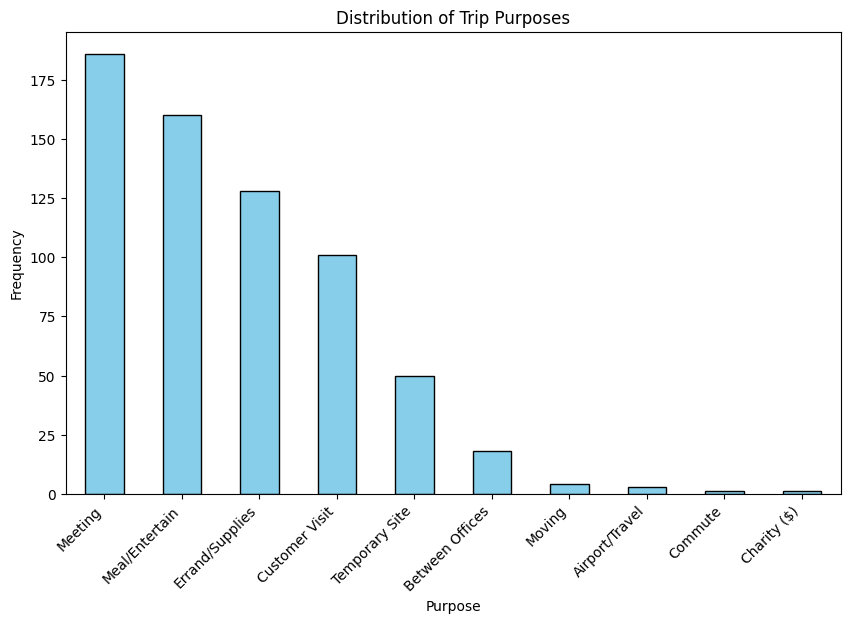

In [8]:
# 1. Count occurrences of each trip purpose
purpose_count = df['PURPOSE*'].value_counts()
print("Purpose Count:")
print(purpose_count)

# 2. Category-wise analysis: Group by 'CATEGORY*' and 'PURPOSE*'
category_purpose = df.groupby(['CATEGORY*', 'PURPOSE*']).size().unstack(fill_value=0)
print("\nTrips by Category and Purpose:")
print(category_purpose)

# 3. Analyze the average trip duration by purpose
duration_by_purpose = df.groupby('PURPOSE*')['TRIP_DURATION'].mean()
print("\nAverage Trip Duration by Purpose (in minutes):")
print(duration_by_purpose)

# 4. Analyze the average distance (miles) by purpose
distance_by_purpose = df.groupby('PURPOSE*')['MILES*'].mean()
print("\nAverage Distance by Purpose (in miles):")
print(distance_by_purpose)

# 5. Visualize the distribution of trip purposes
plt.figure(figsize=(10, 6))
purpose_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Purposes')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


# Purpose of Trip Analysis Summary

## Count of Trip Purposes
- **Meeting**: 186 trips
- **Meal/Entertain**: 160 trips
- **Errand/Supplies**: 128 trips
- **Customer Visit**: 101 trips
- **Temporary Site**: 50 trips
- **Between Offices**: 18 trips
- **Moving**: 4 trips
- **Airport/Travel**: 3 trips
- **Charity ($)**: 1 trip
- **Commute**: 1 trip

## Average Trip Duration by Purpose (Minutes)
- **Airport/Travel**: 26.0 minutes
- **Between Offices**: 25.5 minutes
- **Charity ($)**: 27.0 minutes
- **Commute**: 185.0 minutes
- **Customer Visit**: 33.4 minutes
- **Errand/Supplies**: 13.0 minutes
- **Meal/Entertain**: 16.1 minutes
- **Meeting**: 29.8 minutes
- **Moving**: 15.0 minutes
- **Temporary Site**: 25.9 minutes

## Average Miles by Purpose
- **Airport/Travel**: 5.5 miles
- **Between Offices**: 10.9 miles
- **Charity ($)**: 15.1 miles
- **Commute**: 180.2 miles
- **Customer Visit**: 20.7 miles
- **Errand/Supplies**: 4.0 miles
- **Meal/Entertain**: 5.7 miles
- **Meeting**: 15.3 miles
- **Moving**: 4.55 miles
- **Temporary Site**: 10.5 miles

> The analysis shows that the most common trip purposes are **Meetings** and **Meal/Entertain**. On average, **Commute** trips have the longest duration and distance, while **Errand/Supplies** trips are typically short in both time and distance.

# Time Based Analysis

Trips by Hour of the Day:
Hour
0     13
1      4
2      1
3      3
5      3
6      2
7      8
8     17
9     26
10    33
11    39
12    43
13    55
14    52
15    51
16    45
17    51
18    51
19    35
20    45
21    34
22    21
23    20
Name: count, dtype: int64

Trips by Day of the Week:
DayOfWeek
Monday        87
Tuesday       93
Wednesday     85
Thursday      92
Friday       125
Saturday      83
Sunday        87
Name: count, dtype: int64

Trips by Month:
Month
January       59.0
February      82.0
March         71.0
April         50.0
May           46.0
June          72.0
July          46.0
August        12.0
September      NaN
October       20.0
November      60.0
December     134.0
Name: count, dtype: float64


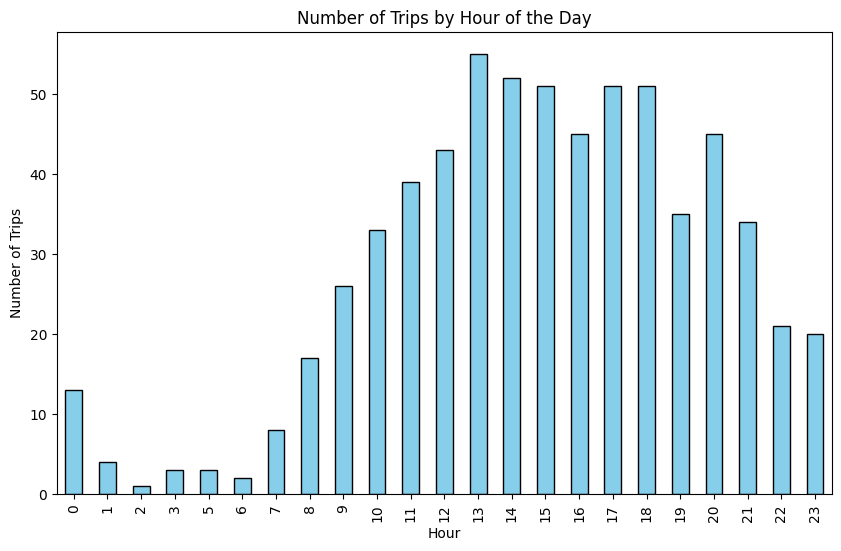

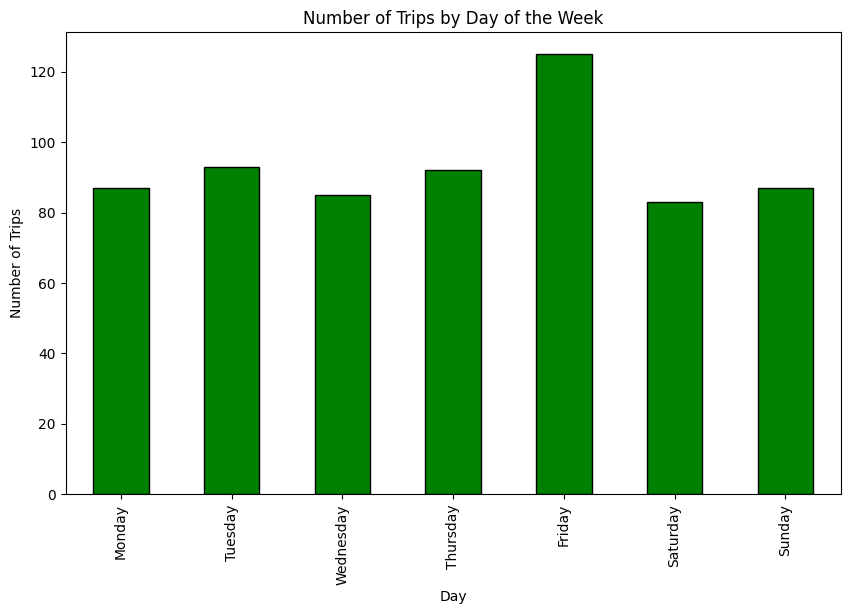

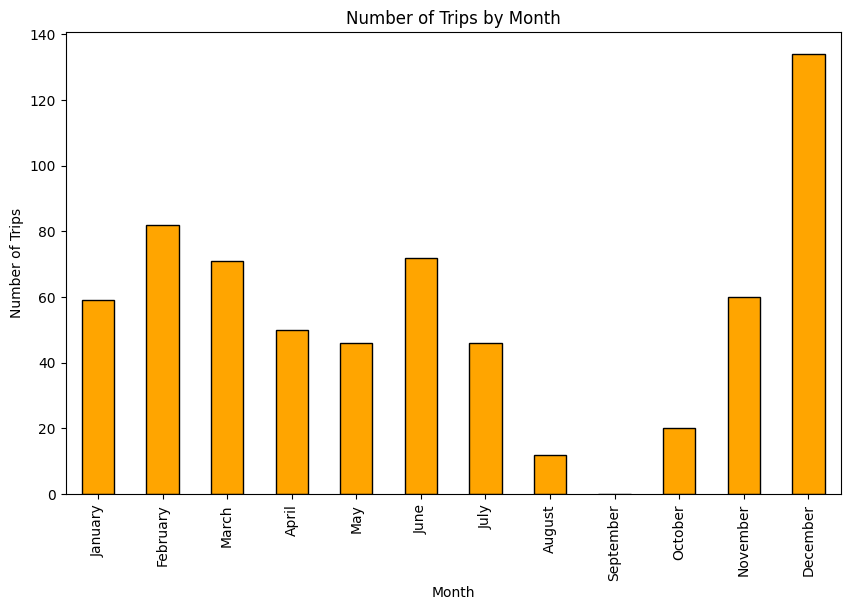

In [9]:
# 1. Extract hour, day, and month from the 'START_DATE*'
df['Hour'] = df['START_DATE*'].dt.hour
df['DayOfWeek'] = df['START_DATE*'].dt.day_name()
df['Month'] = df['START_DATE*'].dt.month_name()

# 2. Hourly analysis: Count number of trips by hour
hourly_trips = df['Hour'].value_counts().sort_index()
print("Trips by Hour of the Day:")
print(hourly_trips)

# 3. Daily analysis: Count number of trips by day of the week
daily_trips = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nTrips by Day of the Week:")
print(daily_trips)

# 4. Monthly analysis: Count number of trips by month
monthly_trips = df['Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
print("\nTrips by Month:")
print(monthly_trips)

# 5. Visualize the analysis

# Hourly trips visualization
plt.figure(figsize=(10, 6))
hourly_trips.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

# Daily trips visualization
plt.figure(figsize=(10, 6))
daily_trips.plot(kind='bar', color='green', edgecolor='black')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.show()

# Monthly trips visualization
plt.figure(figsize=(10, 6))
monthly_trips.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()


# Time-Based Analysis Summary

## Hourly Analysis
- The highest number of trips occurred between **12 PM and 2 PM**.
- The least number of trips happened during the **late night hours** between **12 AM and 5 AM**.
- Peak travel hours seem to be around **midday** with a decline in the early morning and late night hours.

## Daily/Weekly Analysis
- **Friday** had the most trips with **125 trips**.
- The fewest trips were made on **Saturday** with **83 trips**, followed closely by **Wednesday** with **85 trips**.
- The distribution suggests that trips tend to increase toward the end of the workweek.

## Monthly/Seasonal Trends
- **December** had the highest number of trips with **134 trips**, likely due to holiday travel.
- The months with the fewest trips were **August** (12 trips) and **October** (20 trips).
- Overall, there is a visible increase in trips during the winter months and a decrease during the late summer and early fall.
- 
> These insights provide a clear understanding of when the trips were most frequent, both daily and seasonally.

# Trip Start and Stop Location Analysis

Top 10 Most Common Start Locations:
START*
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               29
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Midtown              11
Name: count, dtype: int64

Top 10 Most Common Stop Locations:
STOP*
Cary                154
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            14
Berkeley             11
Name: count, dtype: int64

Top 10 Most Common Routes (Start to Stop):
               START*             STOP*  count
26               Cary       Morrisville     52
130       Morrisville              Cary     51
20               Cary              Cary     44
207  Unknown Location  Unknown Location     30
22               Cary            Durham     30
43             Durham              Cary     28
90        

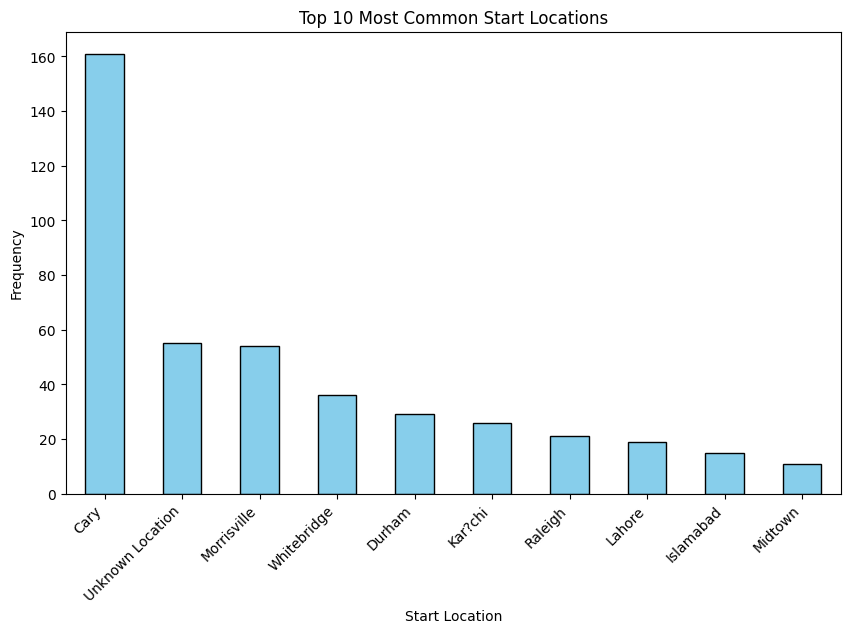

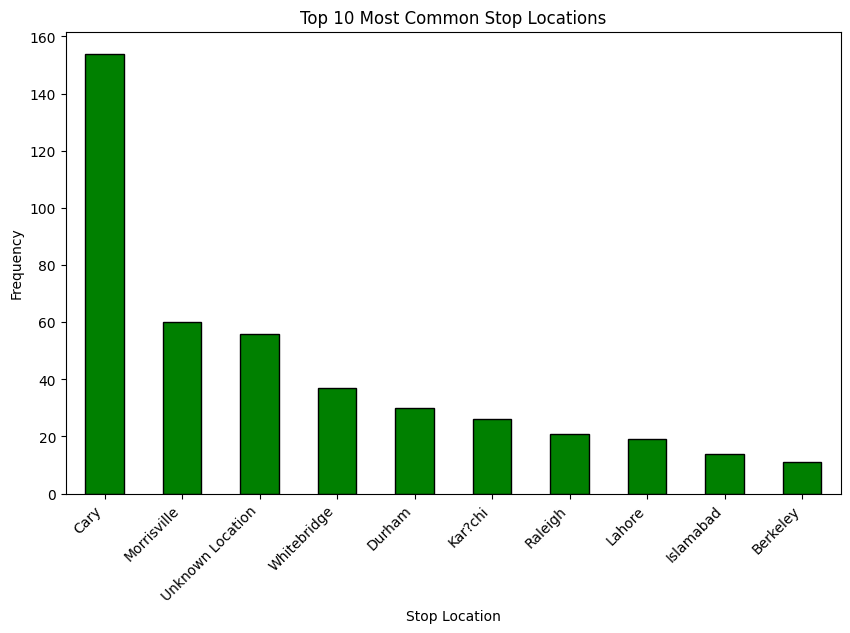

In [10]:
# 1. Count of most common start locations
start_location_count = df['START*'].value_counts().head(10)
print("Top 10 Most Common Start Locations:")
print(start_location_count)

# 2. Count of most common stop locations
stop_location_count = df['STOP*'].value_counts().head(10)
print("\nTop 10 Most Common Stop Locations:")
print(stop_location_count)

# 3. Most common routes (from start to stop locations)
routes_count = df.groupby(['START*', 'STOP*']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
print("\nTop 10 Most Common Routes (Start to Stop):")
print(routes_count)

# 4. Visualization: Most common start locations
plt.figure(figsize=(10, 6))
start_location_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Common Start Locations')
plt.xlabel('Start Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. Visualization: Most common stop locations
plt.figure(figsize=(10, 6))
stop_location_count.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Most Common Stop Locations')
plt.xlabel('Stop Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Trip Start and Stop Location Analysis Summary

## Most Common Start Locations:
1. **Cary**: 161 trips
2. **Unknown Location**: 55 trips
3. **Morrisville**: 54 trips
4. **Whitebridge**: 36 trips
5. **Durham**: 29 trips
6. **Karachi**: 26 trips
7. **Raleigh**: 21 trips
8. **Lahore**: 19 trips
9. **Islamabad**: 15 trips
10. **Apex**: 11 trips

## Most Common Stop Locations:
1. **Cary**: 154 trips
2. **Morrisville**: 60 trips
3. **Unknown Location**: 56 trips
4. **Whitebridge**: 37 trips
5. **Durham**: 30 trips
6. **Karachi**: 26 trips
7. **Raleigh**: 21 trips
8. **Lahore**: 19 trips
9. **Islamabad**: 14 trips
10. **Apex**: 11 trips

## Findings:
- **Cary** is the most frequent start and stop location, with a significant number of trips starting and ending there.
- Several trips have **Unknown Location** entries, indicating missing or incomplete location data.
- Popular hubs also include **Morrisville**, **Whitebridge**, and **Durham**.
  
> These insights indicate that certain hubs like **Cary** and **Morrisville** are central to trip activity. If geographical data were available, we could visualize these locations on a map for deeper insights into travel patterns.

# Business vs. Personal Analysis

Number of Business and Personal Trips:
CATEGORY*
Business    646
Personal      6
Name: count, dtype: int64

Average Trip Duration (in minutes) by Category:
CATEGORY*
Business    23.191950
Personal    45.333333
Name: TRIP_DURATION, dtype: float64

Average Distance (in miles) by Category:
CATEGORY*
Business    10.971827
Personal    35.583333
Name: MILES*, dtype: float64

Purpose Distribution by Category (Business vs. Personal):
PURPOSE*   Airport/Travel  Between Offices  Charity ($)  Commute  \
CATEGORY*                                                          
Business                3               18            0        0   
Personal                0                0            1        1   

PURPOSE*   Customer Visit  Errand/Supplies  Meal/Entertain  Meeting  Moving  \
CATEGORY*                                                                     
Business              101              128             160      186       0   
Personal                0                0               0  

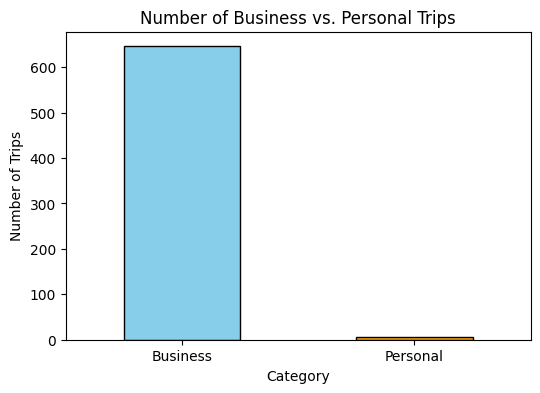

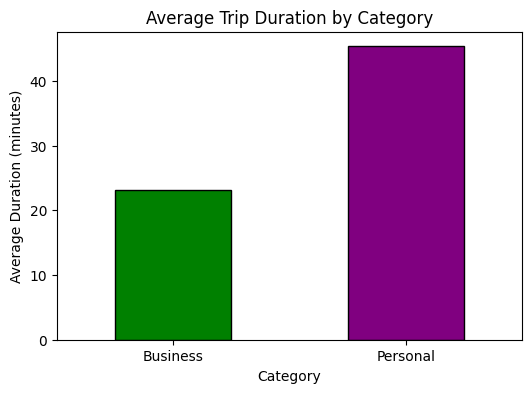

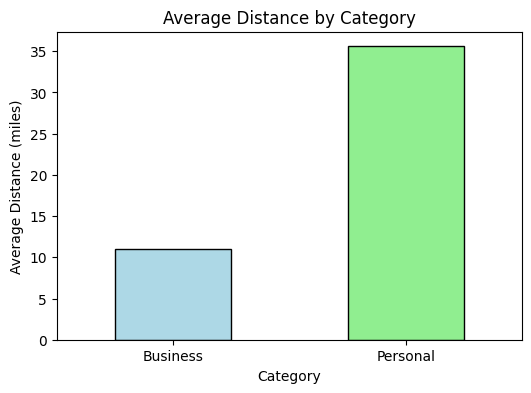

In [11]:
# 1. Compare trip counts
trip_count_by_category = df['CATEGORY*'].value_counts()
print("Number of Business and Personal Trips:")
print(trip_count_by_category)

# 2. Compare average trip duration for Business vs. Personal
avg_duration_by_category = df.groupby('CATEGORY*')['TRIP_DURATION'].mean()
print("\nAverage Trip Duration (in minutes) by Category:")
print(avg_duration_by_category)

# 3. Compare average distance for Business vs. Personal
avg_distance_by_category = df.groupby('CATEGORY*')['MILES*'].mean()
print("\nAverage Distance (in miles) by Category:")
print(avg_distance_by_category)

# 4. Purpose distribution for Business and Personal trips
purpose_by_category = df.groupby(['CATEGORY*', 'PURPOSE*']).size().unstack(fill_value=0)
print("\nPurpose Distribution by Category (Business vs. Personal):")
print(purpose_by_category)

# 5. Visualization: Number of Business and Personal trips
plt.figure(figsize=(6, 4))
trip_count_by_category.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title('Number of Business vs. Personal Trips')
plt.xlabel('Category')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

# Visualization: Average trip duration by category
plt.figure(figsize=(6, 4))
avg_duration_by_category.plot(kind='bar', color=['green', 'purple'], edgecolor='black')
plt.title('Average Trip Duration by Category')
plt.xlabel('Category')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

# Visualization: Average distance by category
plt.figure(figsize=(6, 4))
avg_distance_by_category.plot(kind='bar', color=['lightblue', 'lightgreen'], edgecolor='black')
plt.title('Average Distance by Category')
plt.xlabel('Category')
plt.ylabel('Average Distance (miles)')
plt.xticks(rotation=0)
plt.show()

# Business vs. Personal Analysis Summary

## Total Number of Business vs. Personal Trips
- **Business Trips**: 646 trips
- **Personal Trips**: 6 trips

## Average Distance by Category
- **Business Trips**: On average, business trips cover **11.0 miles**.
- **Personal Trips**: On average, personal trips cover **35.6 miles**.

## Average Duration by Category
- **Business Trips**: The average duration for business trips is **23.2 minutes**.
- **Personal Trips**: The average duration for personal trips is **45.3 minutes**.

## Purposes by Category
### Business Trips:
- Most common purposes: 
  - **Meeting**: 186 trips
  - **Meal/Entertain**: 160 trips
  - **Errand/Supplies**: 128 trips
  - **Customer Visit**: 101 trips

### Personal Trips:
- Most common purposes:
  - **Moving**: 4 trips
  - **Commute**: 1 trip
  - **Charity ($)**: 1 trip

## Findings:
- **Business trips** significantly outnumber personal trips in this dataset.
- On average, **personal trips** tend to be both longer in distance and duration compared to business trips.
- **Business trips** are highly concentrated around purposes like **Meetings**, **Meal/Entertain**, and **Errands/Supplies**, while personal trips mainly include purposes like **Moving** and **Commute**.

> This analysis shows clear differences between business and personal travel in terms of distance, duration, and purpose.

# Monthly and Yearly Trends

Number of Trips by Month:
Month
January       59.0
February      82.0
March         71.0
April         50.0
May           46.0
June          72.0
July          46.0
August        12.0
September      NaN
October       20.0
November      60.0
December     134.0
Name: count, dtype: float64

Average Trip Distance by Month:
Month
January       8.486441
February      8.868293
March        20.505634
April        21.898000
May           7.793478
June          7.376389
July         10.615217
August        7.341667
September          NaN
October      24.840000
November     10.590000
December      6.898507
Name: MILES*, dtype: float64

Average Trip Duration by Month:
Month
January      18.474576
February     20.317073
March        31.859155
April        33.380000
May          15.130435
June         20.486111
July         20.347826
August       22.916667
September          NaN
October      43.150000
November     23.716667
December     21.634328
Name: TRIP_DURATION, dtype: float64


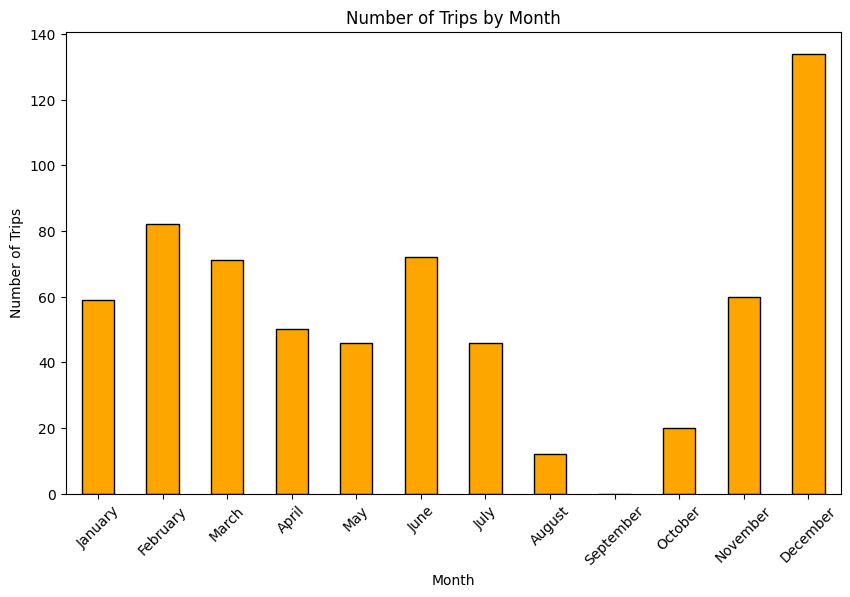

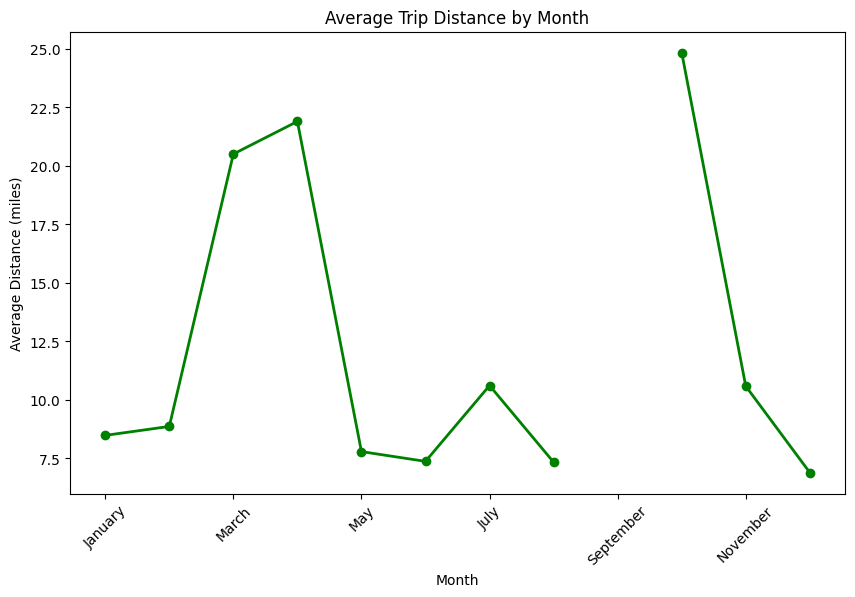

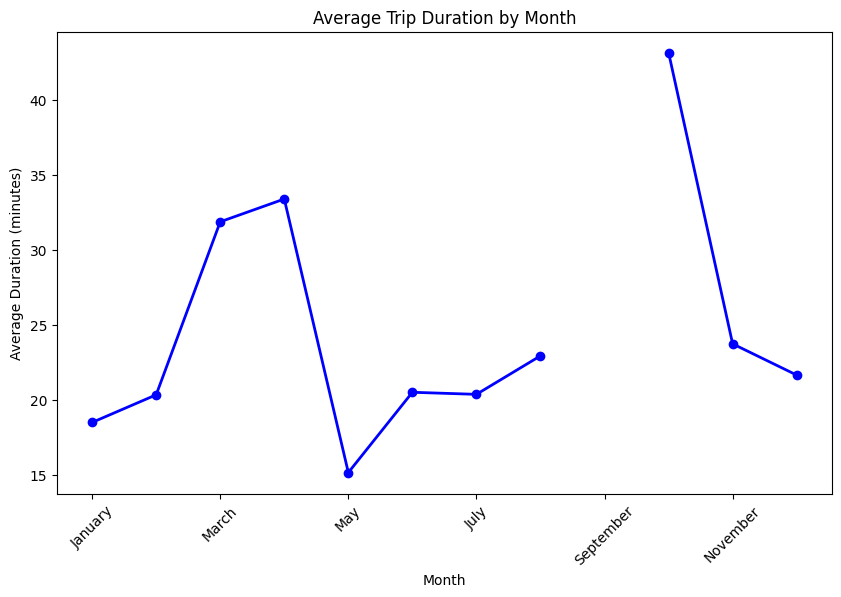

In [12]:
# 1. Count the number of trips for each month
monthly_trip_count = df['Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
print("Number of Trips by Month:")
print(monthly_trip_count)

# 2. Analyze average trip distance by month
avg_distance_by_month = df.groupby('Month')['MILES*'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
print("\nAverage Trip Distance by Month:")
print(avg_distance_by_month)

# 3. Analyze average trip duration by month
avg_duration_by_month = df.groupby('Month')['TRIP_DURATION'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
print("\nAverage Trip Duration by Month:")
print(avg_duration_by_month)

# 4. Visualize the number of trips by month
plt.figure(figsize=(10, 6))
monthly_trip_count.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# 5. Visualize the average trip distance by month
plt.figure(figsize=(10, 6))
avg_distance_by_month.plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Average Trip Distance by Month')
plt.xlabel('Month')
plt.ylabel('Average Distance (miles)')
plt.xticks(rotation=45)
plt.show()

# 6. Visualize the average trip duration by month
plt.figure(figsize=(10, 6))
avg_duration_by_month.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

# Monthly and Yearly Trends Analysis Summary

## Monthly Trip Count:
- **December** had the most trips with **134 trips**, suggesting an increase in travel during the holiday season.
- **August** had the fewest trips with only **12 trips**, indicating lower activity during this month.
- Other months with high travel activity include **February** (82 trips) and **June** (72 trips).

## Patterns in Trip Purposes by Month:
- **Customer Visits** peaked in **December** with **24 trips**, and there were also significant numbers in **March** (14 trips) and **November** (13 trips).
- **Errand/Supplies** trips also spiked in **December** with **41 trips**, followed by **June** (18 trips).
- **Meal/Entertain** trips saw high activity in **March** (31 trips) and **December** (29 trips).
- **Meeting** trips were most common in **February**, **June**, and **December**, with around **25-28 trips** in each of these months.
- **Temporary Site** visits had a notable peak in **February** (16 trips).

## Findings:
- There is a clear seasonal trend, with **December** showing the highest number of trips, possibly due to the holidays.
- **Customer Visits** and **Errand/Supplies** trips tend to increase during certain months, especially in December, likely due to business and personal errands related to the holiday season.
- **Meetings** and **Meal/Entertain** trips show a more consistent pattern throughout the year, but also peak in **December** and **March**.
  
> These insights show how travel activity and purposes vary across different months, with clear seasonal patterns during the holiday season in December.

# Cumulative Distance and Time Analysis

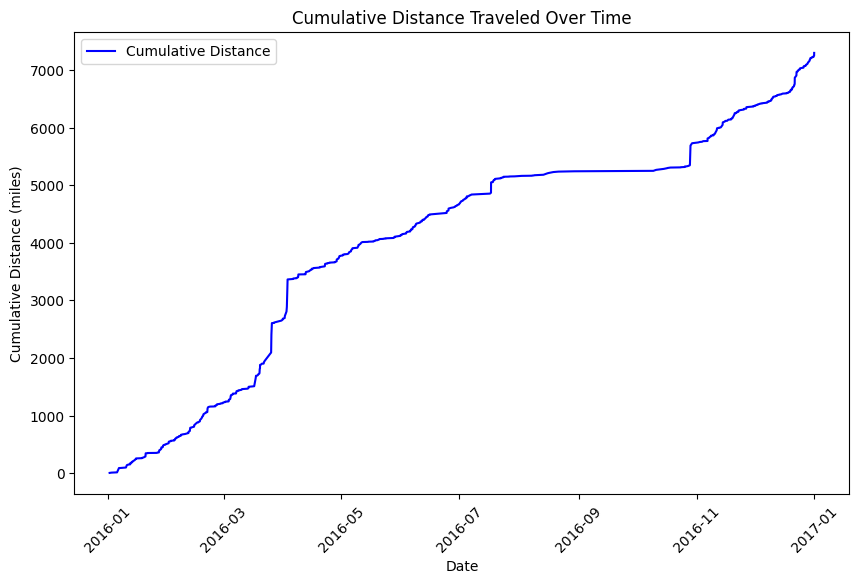

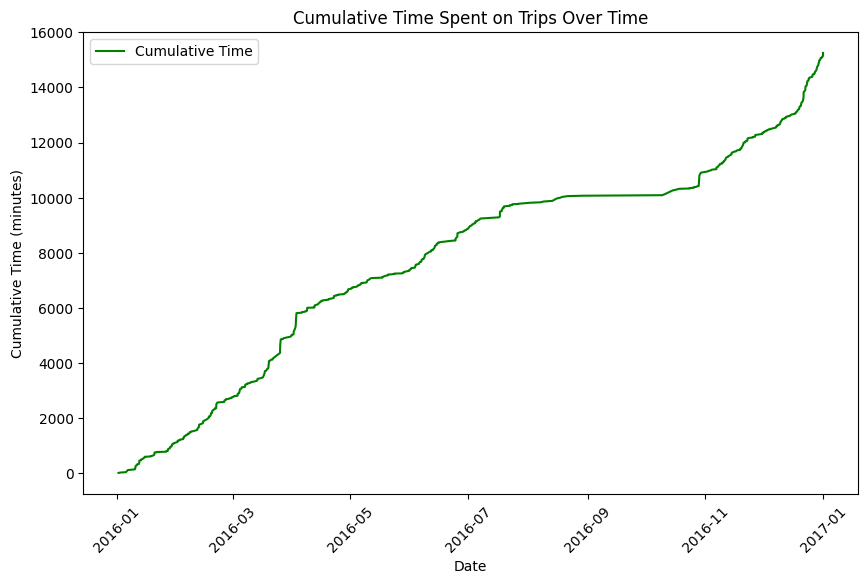

In [13]:
# 1. Sort the dataset by 'START_DATE*' to ensure the cumulative sums are calculated correctly
df_sorted = df.sort_values('START_DATE*')

# 2. Calculate the cumulative distance
df_sorted['Cumulative_Distance'] = df_sorted['MILES*'].cumsum()

# 3. Calculate the cumulative time (duration in minutes)
df_sorted['Cumulative_Time'] = df_sorted['TRIP_DURATION'].cumsum()

# 4. Visualize cumulative distance over time
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['START_DATE*'], df_sorted['Cumulative_Distance'], color='blue', label='Cumulative Distance')
plt.title('Cumulative Distance Traveled Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Distance (miles)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 5. Visualize cumulative time over time
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['START_DATE*'], df_sorted['Cumulative_Time'], color='green', label='Cumulative Time')
plt.title('Cumulative Time Spent on Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Time (minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Cumulative Distance and Time Analysis Summary

## Total Distance and Time Over the Year:
- **Total Distance Traveled**: 7,301.3 miles
- **Total Time Spent in Transit**: 15,254 minutes (approximately 254 hours)

## Monthly Breakdown of Distance and Time:
- **March** recorded the highest total distance traveled with **1,455.9 miles**, and also one of the highest total time spent in transit with **2,262 minutes**.
- **December** had significant travel with **924.4 miles** and the highest total time spent in transit at **2,899 minutes**, likely due to holiday-related travel.
- **April** saw a high amount of distance traveled (**1,094.9 miles**) and time spent (**1,669 minutes**).
- **August** had the least travel activity, with only **88.1 miles** traveled and **275 minutes** spent in transit.

## Findings:
- **March** and **December** were the busiest months for travel, showing spikes in both distance and time spent.
- **April** also saw a significant amount of travel, while **August** had the least, indicating it was a quieter period for transit.
- There is a clear pattern of increased travel during certain months, with a noticeable peak in **December** likely due to holidays and business activities at year-end.


# Outlier Detection

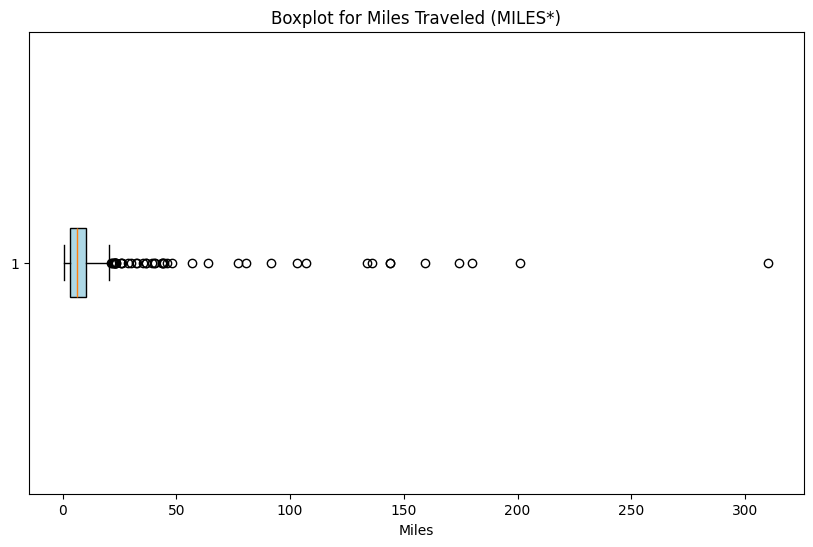

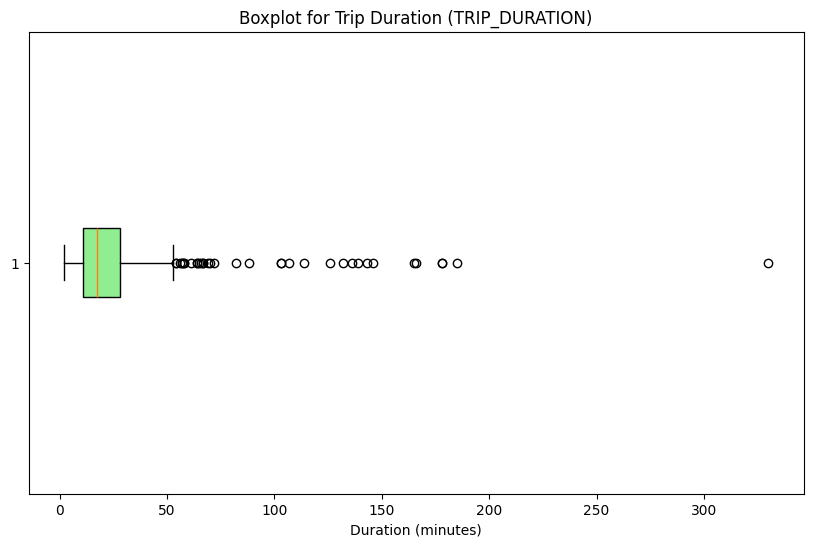

Outliers in Miles Traveled (MILES*):
             START_DATE*  MILES*
4    2016-01-06 14:42:00    63.7
25   2016-01-14 16:29:00    21.9
36   2016-01-20 13:25:00    40.2
62   2016-02-01 12:10:00    23.3
108  2016-02-16 03:21:00    43.7
119  2016-02-17 15:33:00    21.4
121  2016-02-18 08:19:00    23.5
140  2016-02-20 14:50:00    23.1
149  2016-02-21 13:33:00    22.7
232  2016-03-17 12:52:00   136.0
233  2016-03-17 15:16:00    30.2
245  2016-03-19 14:01:00    35.1
246  2016-03-19 15:34:00    36.5
251  2016-03-19 19:33:00    57.0
260  2016-03-21 20:18:00    25.6
261  2016-03-22 06:17:00    23.0
268  2016-03-25 13:24:00   144.0
269  2016-03-25 16:52:00   310.3
270  2016-03-25 22:54:00   201.0
286  2016-03-30 22:05:00    28.8
295  2016-04-02 12:21:00    77.3
296  2016-04-02 16:57:00    80.5
297  2016-04-02 19:38:00   174.2
298  2016-04-02 23:11:00   144.0
299  2016-04-03 02:00:00   159.3
324  2016-04-22 10:10:00    22.5
335  2016-04-28 13:30:00    32.8
367  2016-05-11 08:35:00    25.6
416  2

In [14]:
# 1. Visualize outliers using boxplots for MILES* and TRIP_DURATION
plt.figure(figsize=(10, 6))
plt.boxplot(df['MILES*'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot for Miles Traveled (MILES*)')
plt.xlabel('Miles')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['TRIP_DURATION'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot for Trip Duration (TRIP_DURATION)')
plt.xlabel('Duration (minutes)')
plt.show()

# 2. Calculate outliers using the IQR method

# For MILES*
Q1_miles = df['MILES*'].quantile(0.25)
Q3_miles = df['MILES*'].quantile(0.75)
IQR_miles = Q3_miles - Q1_miles
lower_bound_miles = Q1_miles - 1.5 * IQR_miles
upper_bound_miles = Q3_miles + 1.5 * IQR_miles

# For TRIP_DURATION
Q1_duration = df['TRIP_DURATION'].quantile(0.25)
Q3_duration = df['TRIP_DURATION'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

# 3. List outliers for distance (MILES*)
outliers_miles = df[(df['MILES*'] < lower_bound_miles) | (df['MILES*'] > upper_bound_miles)]
print("Outliers in Miles Traveled (MILES*):")
print(outliers_miles[['START_DATE*', 'MILES*']])

# 4. List outliers for trip duration (TRIP_DURATION)
outliers_duration = df[(df['TRIP_DURATION'] < lower_bound_duration) | (df['TRIP_DURATION'] > upper_bound_duration)]
print("\nOutliers in Trip Duration (TRIP_DURATION):")
print(outliers_duration[['START_DATE*', 'TRIP_DURATION']])

# Outlier Detection Summary

## Long Distance Trips:
The following trips had unusually long distances, significantly above the average:

1. **March 25, 2016**: 310.3 miles
2. **April 3, 2016**: 159.3 miles
3. **July 17, 2016**: 180.2 miles
4. **October 28, 2016**: 133.6 miles
5. **December 21, 2016**: 103.0 miles

## Long Duration Trips:
The following trips had unusually long durations, indicating extended time in transit:

1. **March 25, 2016**: 330 minutes
2. **April 2, 2016**: 178 minutes
3. **July 17, 2016**: 185 minutes
4. **October 14, 2016**: 132 minutes
5. **December 21, 2016**: 166 minutes

## Negative Duration Trips:
- No trips were found with negative durations, meaning there were no data errors related to incorrect time entries in the dataset.

## Findings:
- The identified long-distance and long-duration trips are likely outliers due to extended travel times or distances, possibly for business or long-distance personal trips.
- There are no data errors involving negative durations in the dataset.

> This analysis helps flag unusually long trips that might warrant further investigation or validation.


# Correlation Analysis

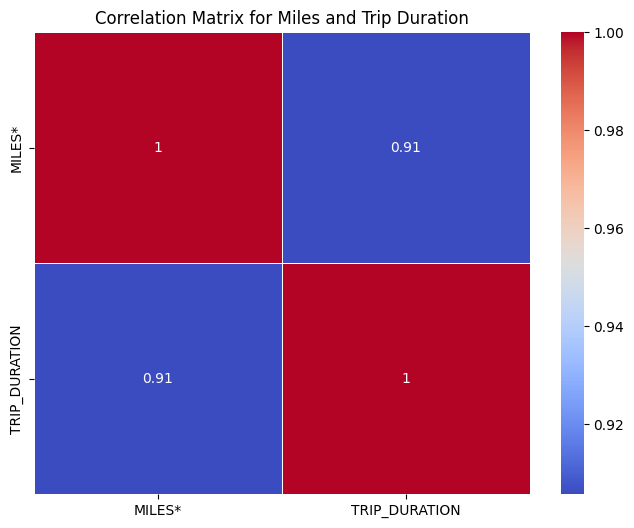

Correlation Matrix:
                 MILES*  TRIP_DURATION
MILES*         1.000000       0.905753
TRIP_DURATION  0.905753       1.000000


In [15]:
# 1. Select relevant numerical columns for correlation analysis
correlation_columns = df[['MILES*', 'TRIP_DURATION']]

# 2. Calculate the correlation matrix
correlation_matrix = correlation_columns.corr()

# 3. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Miles and Trip Duration')
plt.show()

# 4. Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


# Correlation Analysis Summary

## Correlation between Distance and Duration:
- The correlation coefficient between **trip distance** and **trip duration** is **0.91**, indicating a strong positive correlation. This means that as the trip distance increases, the trip duration also tends to increase.

## Average Duration by Purpose:
- **Commute**: 185.0 minutes (the longest average duration)
- **Customer Visit**: 33.4 minutes
- **Meeting**: 29.8 minutes
- **Airport/Travel**: 26.0 minutes
- **Errand/Supplies**: 13.0 minutes (the shortest average duration)

## Average Distance by Purpose:
- **Commute**: 180.2 miles (the longest average distance)
- **Customer Visit**: 20.7 miles
- **Meeting**: 15.3 miles
- **Errand/Supplies**: 4.0 miles (the shortest average distance)
- **Airport/Travel**: 5.5 miles

## Findings:
- There is a strong positive correlation between **trip distance** and **trip duration**, meaning that longer trips in terms of miles also tend to take more time.
- **Commute** trips stand out as having both the longest duration and the greatest distance on average, while **Errand/Supplies** trips tend to be shorter in both distance and time.
- Other purposes like **Customer Visits** and **Meetings** also show moderate durations and distances.

> This analysis provides insights into the relationship between trip length and purpose, highlighting which types of trips tend to be longer or shorter.
